Creating sample data for demonstration...
Dataset shape: (2000, 50, 8)
Target distribution: [ 982 1018]

Data Preprocessing...
Training set shape: (1200, 50, 8)
Validation set shape: (400, 50, 8)
Test set shape: (400, 50, 8)
Class distribution - Train: [589 611], Val: [197 203], Test: [196 204]

Model Architecture:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 50, 64)         │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 50, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 50, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 50, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,777 (139.75 KB)

 Trainable params: 35,553 (138.88 KB)

 Non-trainable params: 224 (896.00 B)


Training LSTM Model...
Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 334ms/step - accuracy: 0.5062 - loss: 0.7468 - val_accuracy: 0.5075 - val_loss: 0.6930 - learning_rate: 1.0000e-04
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 310ms/step - accuracy: 0.5162 - loss: 0.7328 - val_accuracy: 0.5075 - val_loss: 0.6928 - learning_rate: 1.0000e-04
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 312ms/step - accuracy: 0.4964 - loss: 0.7511 - val_accuracy: 0.5075 - val_loss: 0.6928 - learning_rate: 1.0000e-04
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 312ms/step - accuracy: 0.5118 - loss: 0.7174 - val_accuracy: 0.5075 - val_loss: 0.6938 - learning_rate: 1.0000e-04
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.5496 - loss: 0.7166Epoch 5: Train Acc: 0.5233, Val Acc: 0.5075, Loss: 0.7248, Val Loss: 0.6962
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 313ms/step - accuracy: 0.5489 - loss: 0.7168 - val_accuracy: 0.5075 - val_loss: 0.6962 - learning_rate: 1.0000e-04
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s

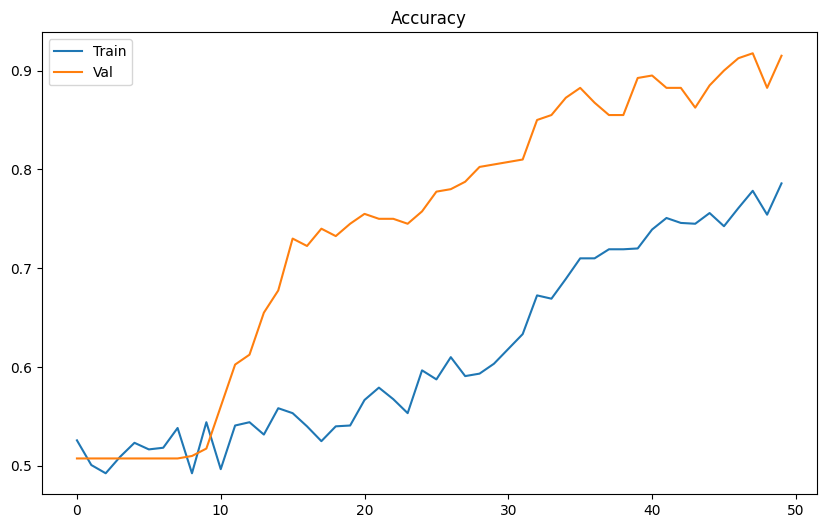

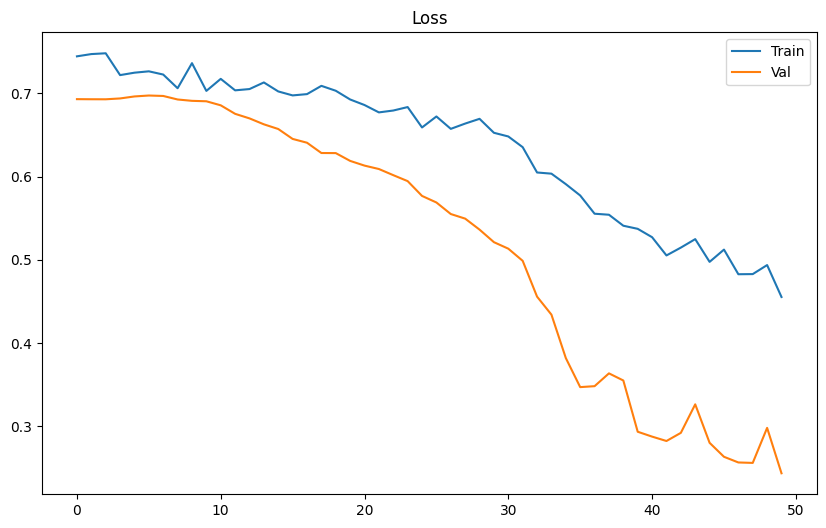


Model saved as improved_lstm_model.h5


In [16]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, classification_report,
                           confusion_matrix, precision_score, recall_score,
                           f1_score, roc_auc_score, roc_curve)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Sample dataset for demo (replace with your dataset)
print("Creating sample data for demonstration...")
def create_sample_data():
    time_steps = 50
    features = 8
    samples = 2000

    X = np.zeros((samples, time_steps, features))
    for i in range(samples):
        base_pattern = np.sin(np.linspace(0, 4*np.pi, time_steps))
        for j in range(features):
            X[i, :, j] = base_pattern * (j+1) + 0.5 * np.random.randn(time_steps)

    y = np.zeros(samples, dtype=int)
    for i in range(samples):
        pattern_sum = np.sum(X[i, :, 0])
        y[i] = 1 if pattern_sum > 0 else 0

    return X, y

X, y = create_sample_data()

print(f"Dataset shape: {X.shape}")
print(f"Target distribution: {np.bincount(y)}")

# Data Preprocessing
print("\nData Preprocessing...")
def preprocess_data(X, y):
    scaler = StandardScaler()
    X_reshaped = X.reshape(-1, X.shape[-1])
    X_scaled = scaler.fit_transform(X_reshaped)
    X_scaled = X_scaled.reshape(X.shape)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    # UPDATED: Validation 25%
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.25, random_state=42, stratify=y_train
    )

    return X_train, X_val, X_test, y_train, y_val, y_test, scaler

X_train, X_val, X_test, y_train, y_val, y_test, scaler = preprocess_data(X, y)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Class distribution - Train: {np.bincount(y_train)}, Val: {np.bincount(y_val)}, Test: {np.bincount(y_test)}")

# Improved LSTM Model
def build_improved_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape, dropout=0.2, recurrent_dropout=0.2),
        BatchNormalization(),

        LSTM(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
        BatchNormalization(),

        LSTM(16, return_sequences=False, dropout=0.2),
        BatchNormalization(),

        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # UPDATED: reduced LR (0.001 → 0.0001)
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Model Architecture
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_improved_lstm_model(input_shape)

print("\nModel Architecture:")
model.summary()

# UPDATED EarlyStopping: monitor val_loss
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.00001,
    verbose=1
)

class TrainingProgressCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 5 == 0:
            print(f'Epoch {epoch+1}: Train Acc: {logs["accuracy"]:.4f}, Val Acc: {logs["val_accuracy"]:.4f}, Loss: {logs["loss"]:.4f}, Val Loss: {logs["val_loss"]:.4f}')

print("\n" + "="*50)
print("Training LSTM Model...")
print("="*50)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr, TrainingProgressCallback()],
    verbose=1
)

# Evaluation
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"\nTraining Accuracy:   {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy:       {test_accuracy:.4f}")

# Predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualization functions (same code as before)

def plot_individual_graphs(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.legend(['Train', 'Val'])
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss')
    plt.legend(['Train', 'Val'])
    plt.show()

plot_individual_graphs(history)

model.save('improved_lstm_model.h5')
print("\nModel saved as improved_lstm_model.h5")



Confusion Matrix:
[[179  17]
 [ 20 184]]

Detailed Metrics:
Accuracy     : 0.9075
Precision    : 0.9154
Sensitivity  : 0.9020
Specificity  : 0.9133
F1 Score     : 0.9086
AUC-ROC      : 0.9721

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       196
           1       0.92      0.90      0.91       204

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



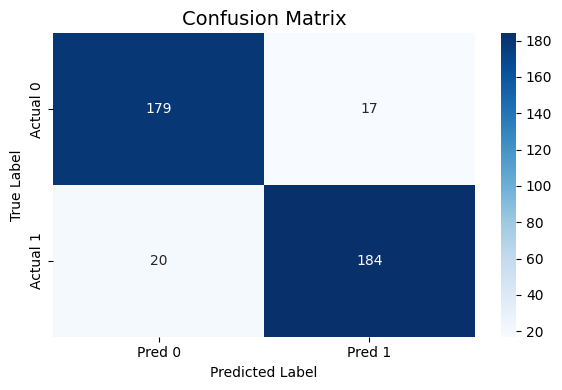

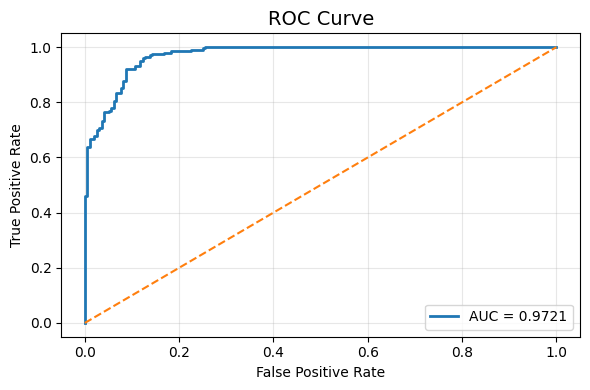

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# y_test = true labels
# y_pred = predicted labels (0/1)
# y_pred_proba = probability predictions

# ==============================
# CONFUSION MATRIX
# ==============================
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("\nConfusion Matrix:")
print(cm)

# ==============================
# ALL METRICS (Manually Calculated)
# ==============================
accuracy     = (tp + tn) / (tp + tn + fp + fn)
precision    = tp / (tp + fp)
recall       = tp / (tp + fn)             # Sensitivity
specificity  = tn / (tn + fp)
f1           = 2 * ((precision * recall) / (precision + recall))
auc_roc      = roc_auc_score(y_test, y_pred_proba)

print("\nDetailed Metrics:")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Sensitivity  : {recall:.4f}")
print(f"Specificity  : {specificity:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"AUC-ROC      : {auc_roc:.4f}")

# ==============================
# CLASSIFICATION REPORT
# ==============================
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ==============================
# CONFUSION MATRIX HEATMAP
# ==============================
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ==============================
# ROC CURVE PLOT
# ==============================
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, label=f"AUC = {auc_roc:.4f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.title("ROC Curve", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
